In [19]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

# Gradient_boosting



=== Sum Click 기반 Gradient Boosting 성능 ===
Accuracy: 0.8682
F1 Score: 0.8087
R2 Score: -0.1427

=== Mean Click 기반 Gradient Boosting 성능 ===
Accuracy: 0.8683
F1 Score: 0.8093
R2 Score: -0.1417

=== Sum Click 기반 최적화 Gradient Boosting 성능 ===
Best Parameters: {'learning_rate': 0.15, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}

=== Mean Click 기반 최적화 Gradient Boosting 성능 ===
Best Parameters: {'learning_rate': 0.15, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Accuracy (Sum Click): 89.9308
Best F1 Score (Sum Click): 88.1390
Best R2 Score (Sum Click): 12.6947
Best Accuracy (Mean Click): 89.6442
Best F1 Score (Mean Click): 87.7456
Best R2 Score (Mean Click): 10.2096


C:\Users\woori\AppData\Local\Temp\ipykernel_8536\704040929.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')


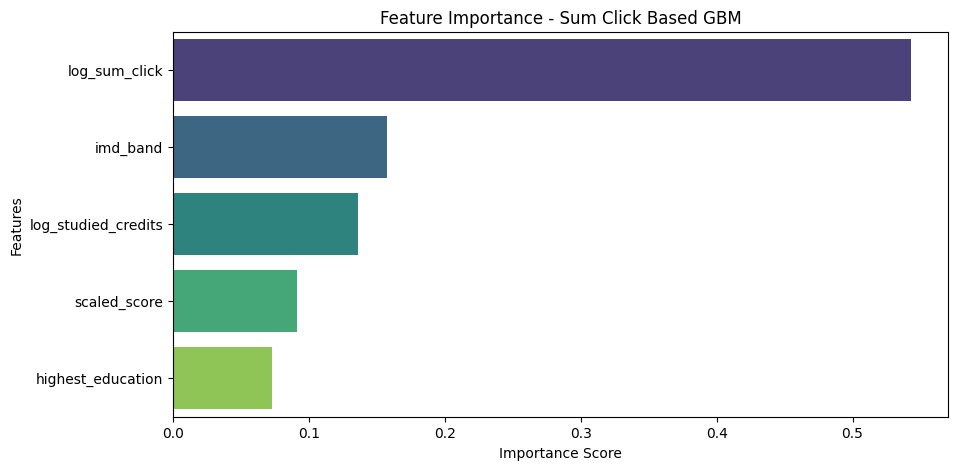

C:\Users\woori\AppData\Local\Temp\ipykernel_8536\704040929.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')


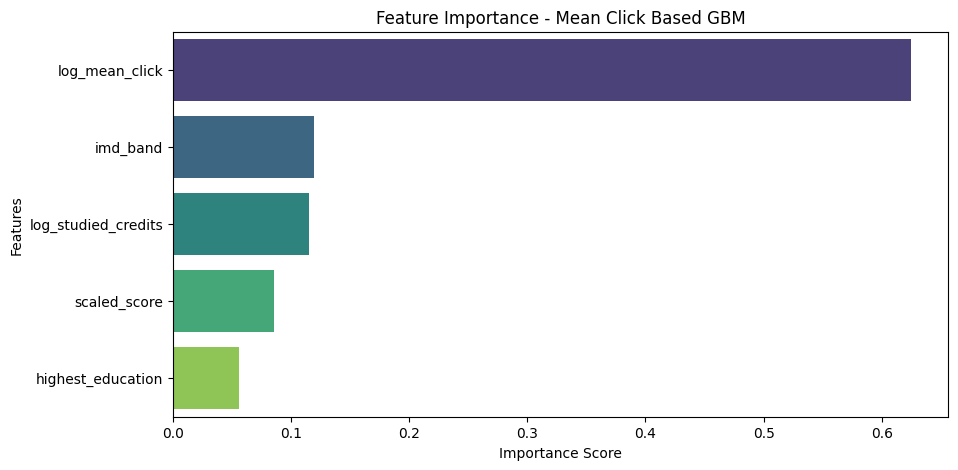

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
final_merged_data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. 새로운 Feature Set 정의
sum_clicked_features = ['highest_education', 'imd_band', 'log_sum_click', 'log_studied_credits', 'scaled_score']
mean_clicked_features = ['highest_education', 'imd_band', 'log_mean_click', 'log_studied_credits', 'scaled_score']

sum_x = final_merged_data[sum_clicked_features]
mean_x = final_merged_data[mean_clicked_features]
y = final_merged_data['final_result']

# 3. 학습 데이터와 테스트 데이터 분리 (Train 90%, Test 10%)
sum_x_train, sum_x_test, y_train, y_test = train_test_split(sum_x, y, test_size=0.1, random_state=42, stratify=y)
mean_x_train, mean_x_test, y_train, y_test = train_test_split(mean_x, y, test_size=0.1, random_state=42, stratify=y)

# 4. 스케일링 (StandardScaler 적용)
scaler = StandardScaler()
sum_x_train  = scaler.fit_transform(sum_x_train).astype(np.float64)
sum_x_test  = scaler.transform(sum_x_test).astype(np.float64)

mean_x_train  = scaler.fit_transform(mean_x_train).astype(np.float64)
mean_x_test  = scaler.transform(mean_x_test).astype(np.float64)

# 5. Gradient Boosting 모델 학습 (Sum Click 기준)
gbm_sum_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_sum_model.fit(sum_x_train , y_train)
y_pred_sum = gbm_sum_model.predict(sum_x_test )

# 6. Gradient Boosting 모델 학습 (Mean Click 기준)
gbm_mean_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gbm_mean_model.fit(mean_x_train , y_train)
y_pred_mean = gbm_mean_model.predict(mean_x_test )

# 7. 성능 평가 (Sum Click 기반 모델)
acc_sum = accuracy_score(y_test, y_pred_sum)
f1_sum = f1_score(y_test, y_pred_sum, average='weighted')
r2_sum = r2_score(y_test, y_pred_sum)

print(f"\n=== Sum Click 기반 Gradient Boosting 성능 ===")
print(f"Accuracy: {acc_sum:.4f}")
print(f"F1 Score: {f1_sum:.4f}")
print(f"R2 Score: {r2_sum:.4f}")

# 8. 성능 평가 (Mean Click 기반 모델)
acc_mean = accuracy_score(y_test, y_pred_mean)
f1_mean = f1_score(y_test, y_pred_mean, average='weighted')
r2_mean = r2_score(y_test, y_pred_mean)

print(f"\n=== Mean Click 기반 Gradient Boosting 성능 ===")
print(f"Accuracy: {acc_mean:.4f}")
print(f"F1 Score: {f1_mean:.4f}")
print(f"R2 Score: {r2_mean:.4f}")

# 9. 하이퍼파라미터 튜닝 (GridSearchCV 적용)
param_grid = {
    'n_estimators': [100, 150],  # 트리 개수
    'learning_rate': [0.1, 0.15],  # 학습률
    'max_depth': [10],  # 트리 깊이
    'min_samples_split': [2, 5],  # 내부 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2]  # 리프 노드 최소 샘플 수
}

grid_search_sum = GridSearchCV(GradientBoostingClassifier(random_state=42),
                               param_grid,
                               cv=3,  # ✅ 3-Fold Cross Validation
                               scoring='accuracy',
                               n_jobs=-1)
grid_search_sum.fit(sum_x_train , y_train)

grid_search_mean = GridSearchCV(GradientBoostingClassifier(random_state=42),
                                param_grid,
                                cv=3,  # ✅ 3-Fold Cross Validation
                                scoring='accuracy',
                                n_jobs=-1)
grid_search_mean.fit(mean_x_train , y_train)

# 10. 최적의 하이퍼파라미터 및 성능 확인
best_sum_model = grid_search_sum.best_estimator_
best_mean_model = grid_search_mean.best_estimator_

best_params_sum = grid_search_sum.best_params_
best_params_mean = grid_search_mean.best_params_

print("\n=== Sum Click 기반 최적화 Gradient Boosting 성능 ===")
print(f"Best Parameters: {best_params_sum}")

print("\n=== Mean Click 기반 최적화 Gradient Boosting 성능 ===")
print(f"Best Parameters: {best_params_mean}")

# 11. 최적 모델 평가 (Sum Click)
y_pred_best_sum = best_sum_model.predict(sum_x_test )
acc_best_sum = accuracy_score(y_test, y_pred_best_sum) * 100
f1_best_sum = f1_score(y_test, y_pred_best_sum, average='weighted') * 100
r2_best_sum = r2_score(y_test, y_pred_best_sum) * 100

print(f"Best Accuracy (Sum Click): {acc_best_sum:.4f}")
print(f"Best F1 Score (Sum Click): {f1_best_sum:.4f}")
print(f"Best R2 Score (Sum Click): {r2_best_sum:.4f}")

# 12. 최적 모델 평가 (Mean Click)
y_pred_best_mean = best_mean_model.predict(mean_x_test )
acc_best_mean = accuracy_score(y_test, y_pred_best_mean) * 100
f1_best_mean = f1_score(y_test, y_pred_best_mean, average='weighted') * 100
r2_best_mean = r2_score(y_test, y_pred_best_mean) * 100

print(f"Best Accuracy (Mean Click): {acc_best_mean:.4f}")
print(f"Best F1 Score (Mean Click): {f1_best_mean:.4f}")
print(f"Best R2 Score (Mean Click): {r2_best_mean:.4f}")

# 13. Feature Importance 시각화 (Sum Click)
plt.figure(figsize=(10, 5))
feature_importances_sum = pd.Series(best_sum_model.feature_importances_, index=sum_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')
plt.title("Feature Importance - Sum Click Based GBM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 14. Feature Importance 시각화 (Mean Click)
plt.figure(figsize=(10, 5))
feature_importances_mean = pd.Series(best_mean_model.feature_importances_, index=mean_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')
plt.title("Feature Importance - Mean Click Based GBM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# 진짜 GBM



Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits

=== Sum Click 기반 최적화 Gradient Boosting 성능 ===
Best Parameters: {'subsample': 0.9, 'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 9, 'learning_rate': 0.15}

=== Mean Click 기반 최적화 Gradient Boosting 성능 ===
Best Parameters: {'subsample': 0.8, 'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 9, 'learning_rate': 0.1}

=== Best Sum Click 기반 Gradient Boosting 성능 ===
Accuracy: 0.9040
F1 Score: 0.8983
R2 Score: 0.1673
Confusion Matrix:
[[ 1279  1181]
 [  595 15437]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.52      0.59      2460
           1       0.93      0.96      0.95     16032

    accuracy                           0.90     18492
   macro avg       0.81      0.74      0.77     18492
weighted a

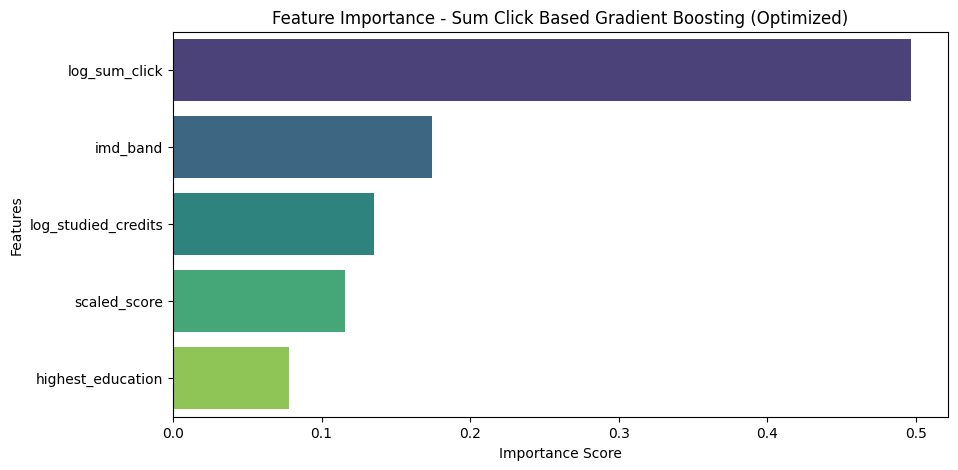

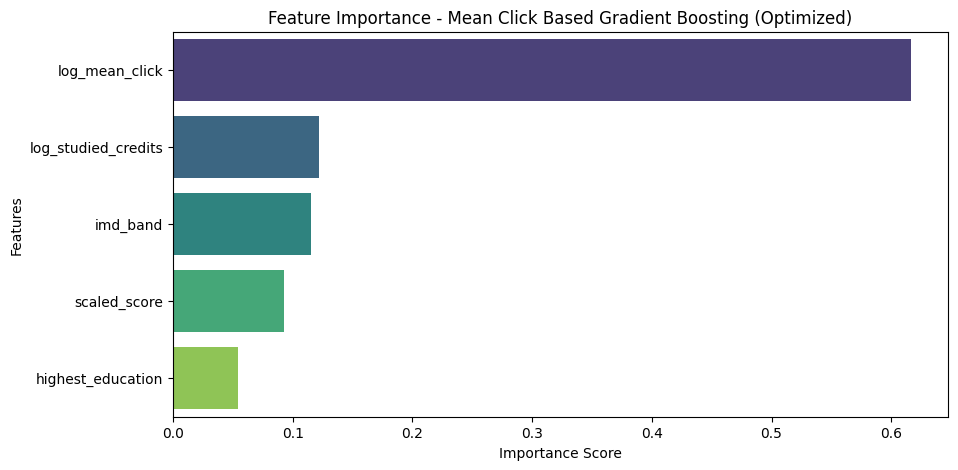

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
final_merged_data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. Feature Set 정의 (원본 데이터 유지)
sum_clicked_features = ['highest_education', 'imd_band', 'log_sum_click', 'log_studied_credits', 'scaled_score']
mean_clicked_features = ['highest_education', 'imd_band', 'log_mean_click', 'log_studied_credits', 'scaled_score']

sum_x = final_merged_data[sum_clicked_features]
mean_x = final_merged_data[mean_clicked_features]
y = final_merged_data['final_result']

# 3. 학습 데이터와 테스트 데이터 분리 (Train 90%, Test 10%)
sum_x_train, sum_x_test, y_train, y_test = train_test_split(sum_x, y, test_size=0.1, random_state=42, stratify=y)
mean_x_train, mean_x_test, y_train, y_test = train_test_split(mean_x, y, test_size=0.1, random_state=42, stratify=y)

# 4. 스케일링 (RobustScaler 사용)
scaler = RobustScaler()
sum_x_train  = scaler.fit_transform(sum_x_train).astype(np.float64)
sum_x_test  = scaler.transform(sum_x_test).astype(np.float64)

mean_x_train  = scaler.fit_transform(mean_x_train).astype(np.float64)
mean_x_test  = scaler.transform(mean_x_test).astype(np.float64)

# 5. 최적의 하이퍼파라미터 탐색 (RandomizedSearchCV)
param_dist = {
    'n_estimators': [200, 400, 600, 800],  # 트리 개수
    'learning_rate': [0.01, 0.05, 0.1, 0.15],  # 학습률
    'max_depth': [3, 5, 7, 9],  # 트리 깊이
    'min_samples_split': [2, 5, 10],  # 내부 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4, 8],  # 리프 노드 최소 샘플 수
    'subsample': [0.7, 0.8, 0.9, 1.0],  # 샘플링 비율
    'max_features': ['sqrt', 'log2', None]  # 특성 샘플링 방식
}

# ✅ RandomizedSearchCV 실행 (Sum Click 기준)
random_search_sum = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                                       param_distributions=param_dist,
                                       n_iter=30,  # 랜덤 탐색 횟수 증가
                                       cv=3,
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       verbose=1)
random_search_sum.fit(sum_x_train , y_train)

# ✅ RandomizedSearchCV 실행 (Mean Click 기준)
random_search_mean = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                                        param_distributions=param_dist,
                                        n_iter=30,
                                        cv=3,
                                        scoring='accuracy',
                                        n_jobs=-1,
                                        verbose=1)
random_search_mean.fit(mean_x_train , y_train)

# 6. 최적 하이퍼파라미터 확인
best_sum_params = random_search_sum.best_params_
best_mean_params = random_search_mean.best_params_

print("\n=== Sum Click 기반 최적화 Gradient Boosting 성능 ===")
print(f"Best Parameters: {best_sum_params}")

print("\n=== Mean Click 기반 최적화 Gradient Boosting 성능 ===")
print(f"Best Parameters: {best_mean_params}")

# 7. 최적 하이퍼파라미터 적용하여 모델 학습
gbm_sum_model = GradientBoostingClassifier(**best_sum_params, random_state=42)
gbm_sum_model.fit(sum_x_train , y_train)
y_pred_best_sum = gbm_sum_model.predict(sum_x_test )

gbm_mean_model = GradientBoostingClassifier(**best_mean_params, random_state=42)
gbm_mean_model.fit(mean_x_train , y_train)
y_pred_best_mean = gbm_mean_model.predict(mean_x_test )

# 8. 최적 모델 성능 평가
def evaluate_model(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    r2 = r2_score(y_true, y_pred)
    print(f"\n=== {model_name} 성능 ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model("Best Sum Click 기반 Gradient Boosting", y_test, y_pred_best_sum)
evaluate_model("Best Mean Click 기반 Gradient Boosting", y_test, y_pred_best_mean)

# 9. Feature Importance 시각화
plt.figure(figsize=(10, 5))
feature_importances_sum = pd.Series(gbm_sum_model.feature_importances_, index=sum_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')
plt.title("Feature Importance - Sum Click Based Gradient Boosting (Optimized)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

plt.figure(figsize=(10, 5))
feature_importances_mean = pd.Series(gbm_mean_model.feature_importances_, index=mean_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')
plt.title("Feature Importance - Mean Click Based Gradient Boosting (Optimized)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# 이건 진짜 Random Forest



=== Sum Click 기반 Random Forest 성능 ===
Accuracy: 0.8690
F1 Score: 0.8113
R2 Score: -0.1356

=== Mean Click 기반 Random Forest 성능 ===
Accuracy: 0.8696
F1 Score: 0.8123
R2 Score: -0.1309

=== Sum Click 기반 최적화 Random Forest 성능 ===
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

=== Mean Click 기반 최적화 Random Forest 성능 ===
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Accuracy (Sum Click): 88.3301
Best F1 Score (Sum Click): 85.8965
Best R2 Score (Sum Click): -1.1842
Best Accuracy (Mean Click): 88.2165
Best F1 Score (Mean Click): 85.4988
Best R2 Score (Mean Click): -2.1688


C:\Users\woori\AppData\Local\Temp\ipykernel_8536\1366917789.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')


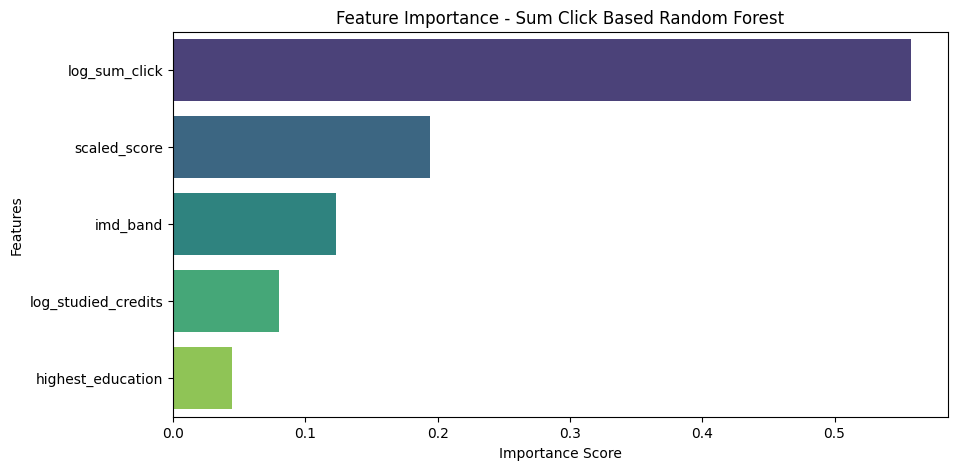

C:\Users\woori\AppData\Local\Temp\ipykernel_8536\1366917789.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')


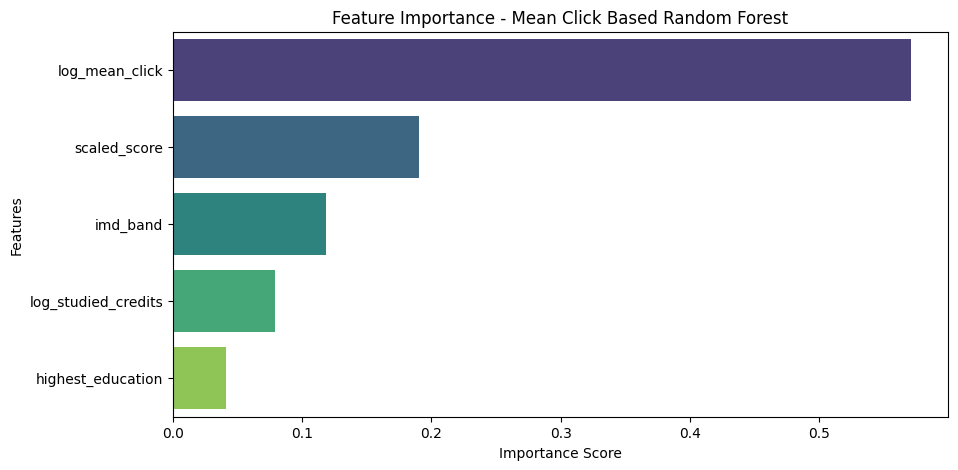

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
final_merged_data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. Feature Set 정의 (Sum Click vs Mean Click 기반)
sum_clicked_features = ['highest_education', 'imd_band', 'log_sum_click', 'log_studied_credits', 'scaled_score']
mean_clicked_features = ['highest_education', 'imd_band', 'log_mean_click', 'log_studied_credits', 'scaled_score']

sum_x = final_merged_data[sum_clicked_features]
mean_x = final_merged_data[mean_clicked_features]
y = final_merged_data['final_result']

# 3. 학습 데이터와 테스트 데이터 분리 (Train 90%, Test 10%)
sum_x_train, sum_x_test, y_train, y_test = train_test_split(sum_x, y, test_size=0.1, random_state=42, stratify=y)
mean_x_train, mean_x_test, y_train, y_test = train_test_split(mean_x, y, test_size=0.1, random_state=42, stratify=y)

# 4. 스케일링 (StandardScaler 적용)
scaler = StandardScaler()
sum_x_train  = scaler.fit_transform(sum_x_train).astype(np.float64)
sum_x_test  = scaler.transform(sum_x_test).astype(np.float64)

mean_x_train  = scaler.fit_transform(mean_x_train).astype(np.float64)
mean_x_test  = scaler.transform(mean_x_test).astype(np.float64)

# 5. Random Forest 모델 학습 (Sum Click 기준)
rf_sum_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_sum_model.fit(sum_x_train , y_train)
y_pred_sum = rf_sum_model.predict(sum_x_test )

# 6. Random Forest 모델 학습 (Mean Click 기준)
rf_mean_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_mean_model.fit(mean_x_train , y_train)
y_pred_mean = rf_mean_model.predict(mean_x_test )

# 7. 성능 평가 (Sum Click 기반 모델)
acc_sum = accuracy_score(y_test, y_pred_sum)
f1_sum = f1_score(y_test, y_pred_sum, average='weighted')
r2_sum = r2_score(y_test, y_pred_sum)

print(f"\n=== Sum Click 기반 Random Forest 성능 ===")
print(f"Accuracy: {acc_sum:.4f}")
print(f"F1 Score: {f1_sum:.4f}")
print(f"R2 Score: {r2_sum:.4f}")

# 8. 성능 평가 (Mean Click 기반 모델)
acc_mean = accuracy_score(y_test, y_pred_mean)
f1_mean = f1_score(y_test, y_pred_mean, average='weighted')
r2_mean = r2_score(y_test, y_pred_mean)

print(f"\n=== Mean Click 기반 Random Forest 성능 ===")
print(f"Accuracy: {acc_mean:.4f}")
print(f"F1 Score: {f1_mean:.4f}")
print(f"R2 Score: {r2_mean:.4f}")

# 9. 하이퍼파라미터 튜닝 (GridSearchCV 적용)
param_grid = {
    'n_estimators': [300],  # 트리 개수
    'max_depth': [5, 10, 20],  # 트리 깊이
    'min_samples_split': [2, 5],  # 내부 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2]  # 리프 노드 최소 샘플 수
}

grid_search_sum = GridSearchCV(RandomForestClassifier(random_state=42),
                               param_grid,
                               cv=3,  # 3-Fold Cross Validation
                               scoring='accuracy',
                               n_jobs=-1)
grid_search_sum.fit(sum_x_train , y_train)

grid_search_mean = GridSearchCV(RandomForestClassifier(random_state=42),
                                param_grid,
                                cv=3,  # 3-Fold Cross Validation
                                scoring='accuracy',
                                n_jobs=-1)
grid_search_mean.fit(mean_x_train , y_train)

# 10. 최적의 하이퍼파라미터 및 성능 확인
best_sum_model = grid_search_sum.best_estimator_
best_mean_model = grid_search_mean.best_estimator_

best_params_sum = grid_search_sum.best_params_
best_params_mean = grid_search_mean.best_params_

print("\n=== Sum Click 기반 최적화 Random Forest 성능 ===")
print(f"Best Parameters: {best_params_sum}")

print("\n=== Mean Click 기반 최적화 Random Forest 성능 ===")
print(f"Best Parameters: {best_params_mean}")

# 11. 최적 모델 평가 (Sum Click)
y_pred_best_sum = best_sum_model.predict(sum_x_test )
acc_best_sum = accuracy_score(y_test, y_pred_best_sum) * 100
f1_best_sum = f1_score(y_test, y_pred_best_sum, average='weighted') * 100
r2_best_sum = r2_score(y_test, y_pred_best_sum) * 100

print(f"Best Accuracy (Sum Click): {acc_best_sum:.4f}")
print(f"Best F1 Score (Sum Click): {f1_best_sum:.4f}")
print(f"Best R2 Score (Sum Click): {r2_best_sum:.4f}")

# 12. 최적 모델 평가 (Mean Click)
y_pred_best_mean = best_mean_model.predict(mean_x_test )
acc_best_mean = accuracy_score(y_test, y_pred_best_mean) * 100
f1_best_mean = f1_score(y_test, y_pred_best_mean, average='weighted') * 100
r2_best_mean = r2_score(y_test, y_pred_best_mean) * 100

print(f"Best Accuracy (Mean Click): {acc_best_mean:.4f}")
print(f"Best F1 Score (Mean Click): {f1_best_mean:.4f}")
print(f"Best R2 Score (Mean Click): {r2_best_mean:.4f}")

# 13. Feature Importance 시각화 (Sum Click)
plt.figure(figsize=(10, 5))
feature_importances_sum = pd.Series(best_sum_model.feature_importances_, index=sum_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')
plt.title("Feature Importance - Sum Click Based Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 14. Feature Importance 시각화 (Mean Click)
plt.figure(figsize=(10, 5))
feature_importances_mean = pd.Series(best_mean_model.feature_importances_, index=mean_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')
plt.title("Feature Importance - Mean Click Based Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# LightGBM


[LightGBM] [Info] Number of positive: 144286, number of negative: 22138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 166424, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.866978 -> initscore=1.874502
[LightGBM] [Info] Start training from score 1.874502
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

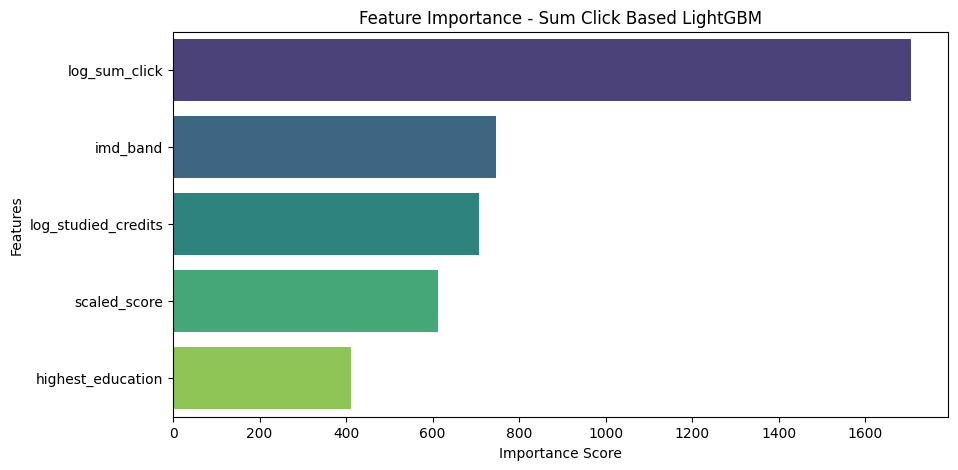

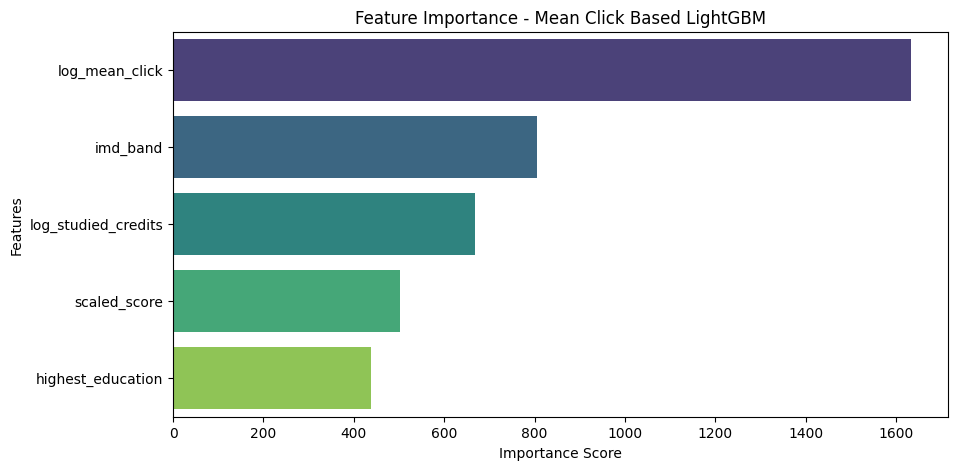

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
final_merged_data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. Feature Set 정의 (Sum Click vs Mean Click 기반)
sum_clicked_features = ['highest_education', 'imd_band', 'log_sum_click', 'log_studied_credits', 'scaled_score']
mean_clicked_features = ['highest_education', 'imd_band', 'log_mean_click', 'log_studied_credits', 'scaled_score']

sum_x = final_merged_data[sum_clicked_features]
mean_x = final_merged_data[mean_clicked_features]
y = final_merged_data['final_result']

# 3. 학습 데이터와 테스트 데이터 분리 (Train 90%, Test 10%)
sum_x_train, sum_x_test, y_train, y_test = train_test_split(sum_x, y, test_size=0.1, random_state=42, stratify=y)
mean_x_train, mean_x_test, y_train, y_test = train_test_split(mean_x, y, test_size=0.1, random_state=42, stratify=y)

# 4. 스케일링 (StandardScaler 적용)
scaler = StandardScaler()
sum_x_train  = scaler.fit_transform(sum_x_train).astype(np.float64)
sum_x_test  = scaler.transform(sum_x_test).astype(np.float64)

mean_x_train  = scaler.fit_transform(mean_x_train).astype(np.float64)
mean_x_test  = scaler.transform(mean_x_test).astype(np.float64)

# 5. LightGBM 모델 학습 (Sum Click 기준)
lgb_sum_model = LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
lgb_sum_model.fit(sum_x_train , y_train)
y_pred_sum = lgb_sum_model.predict(sum_x_test )

# 6. LightGBM 모델 학습 (Mean Click 기준)
lgb_mean_model = LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
lgb_mean_model.fit(mean_x_train , y_train)
y_pred_mean = lgb_mean_model.predict(mean_x_test )

# 7. 성능 평가 (Sum Click 기반 모델)
acc_sum = accuracy_score(y_test, y_pred_sum)
f1_sum = f1_score(y_test, y_pred_sum, average='weighted')
r2_sum = r2_score(y_test, y_pred_sum)

print(f"\n=== Sum Click 기반 LightGBM 성능 ===")
print(f"Accuracy: {acc_sum:.4f}")
print(f"F1 Score: {f1_sum:.4f}")
print(f"R2 Score: {r2_sum:.4f}")

# 8. 성능 평가 (Mean Click 기반 모델)
acc_mean = accuracy_score(y_test, y_pred_mean)
f1_mean = f1_score(y_test, y_pred_mean, average='weighted')
r2_mean = r2_score(y_test, y_pred_mean)

print(f"\n=== Mean Click 기반 LightGBM 성능 ===")
print(f"Accuracy: {acc_mean:.4f}")
print(f"F1 Score: {f1_mean:.4f}")
print(f"R2 Score: {r2_mean:.4f}")

# 9. 하이퍼파라미터 튜닝 (GridSearchCV 적용)
param_grid = {
    'n_estimators': [100, 150],  # 트리 개수
    'learning_rate': [0.1, 0.15],  # 학습률
    'max_depth': [3, 5],  # 트리 깊이
    'num_leaves': [20, 30, 40],  # 리프 노드 개수
    'min_child_samples': [10, 20],  # 최소 샘플 수
    'subsample': [0.8, 1.0],  # 샘플링 비율
    'colsample_bytree': [0.8, 1.0]  # 트리별 특성 샘플링 비율
}

grid_search_sum = GridSearchCV(LGBMClassifier(random_state=42),
                               param_grid,
                               cv=3,  # 3-Fold Cross Validation
                               scoring='accuracy',
                               n_jobs=-1)
grid_search_sum.fit(sum_x_train , y_train)

grid_search_mean = GridSearchCV(LGBMClassifier(random_state=42),
                                param_grid,
                                cv=3,  # 3-Fold Cross Validation
                                scoring='accuracy',
                                n_jobs=-1)
grid_search_mean.fit(mean_x_train , y_train)

# 10. 최적의 하이퍼파라미터 및 성능 확인
best_sum_model = grid_search_sum.best_estimator_
best_mean_model = grid_search_mean.best_estimator_

best_params_sum = grid_search_sum.best_params_
best_params_mean = grid_search_mean.best_params_

print("\n=== Sum Click 기반 최적화 LightGBM 성능 ===")
print(f"Best Parameters: {best_params_sum}")

print("\n=== Mean Click 기반 최적화 LightGBM 성능 ===")
print(f"Best Parameters: {best_params_mean}")

# 11. 최적 모델 평가 (Sum Click)
y_pred_best_sum = best_sum_model.predict(sum_x_test )
acc_best_sum = accuracy_score(y_test, y_pred_best_sum) * 100
f1_best_sum = f1_score(y_test, y_pred_best_sum, average='weighted') * 100
r2_best_sum = r2_score(y_test, y_pred_best_sum) * 100

print(f"Best Accuracy (Sum Click): {acc_best_sum:.4f}")
print(f"Best F1 Score (Sum Click): {f1_best_sum:.4f}")
print(f"Best R2 Score (Sum Click): {r2_best_sum:.4f}")

# 12. 최적 모델 평가 (Mean Click)
y_pred_best_mean = best_mean_model.predict(mean_x_test )
acc_best_mean = accuracy_score(y_test, y_pred_best_mean) * 100
f1_best_mean = f1_score(y_test, y_pred_best_mean, average='weighted') * 100
r2_best_mean = r2_score(y_test, y_pred_best_mean) * 100

print(f"Best Accuracy (Mean Click): {acc_best_mean:.4f}")
print(f"Best F1 Score (Mean Click): {f1_best_mean:.4f}")
print(f"Best R2 Score (Mean Click): {r2_best_mean:.4f}")

# 13. Feature Importance 시각화 (Sum Click)
plt.figure(figsize=(10, 5))
feature_importances_sum = pd.Series(best_sum_model.feature_importances_, index=sum_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')
plt.title("Feature Importance - Sum Click Based LightGBM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 14. Feature Importance 시각화 (Mean Click)
plt.figure(figsize=(10, 5))
feature_importances_mean = pd.Series(best_mean_model.feature_importances_, index=mean_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')
plt.title("Feature Importance - Mean Click Based LightGBM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# 진짜 LightGBM


[LightGBM] [Info] Number of positive: 144286, number of negative: 22138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 166424, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.866978 -> initscore=1.874502
[LightGBM] [Info] Start training from score 1.874502
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

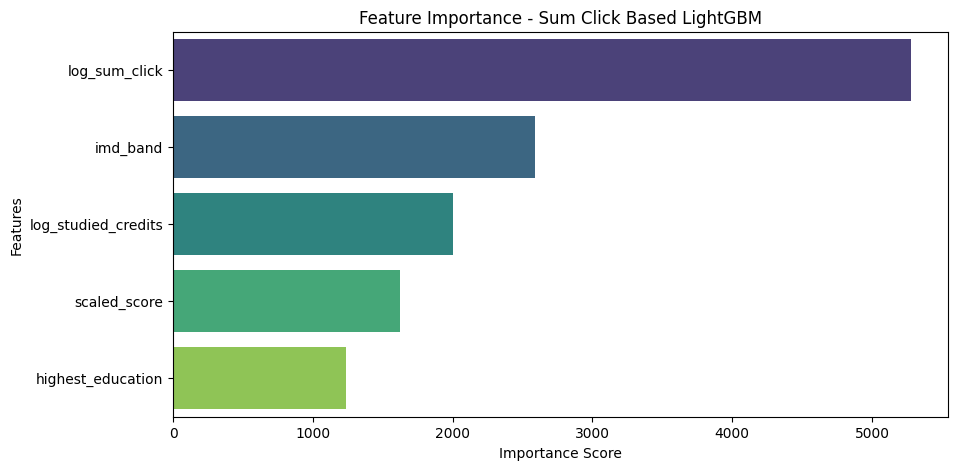

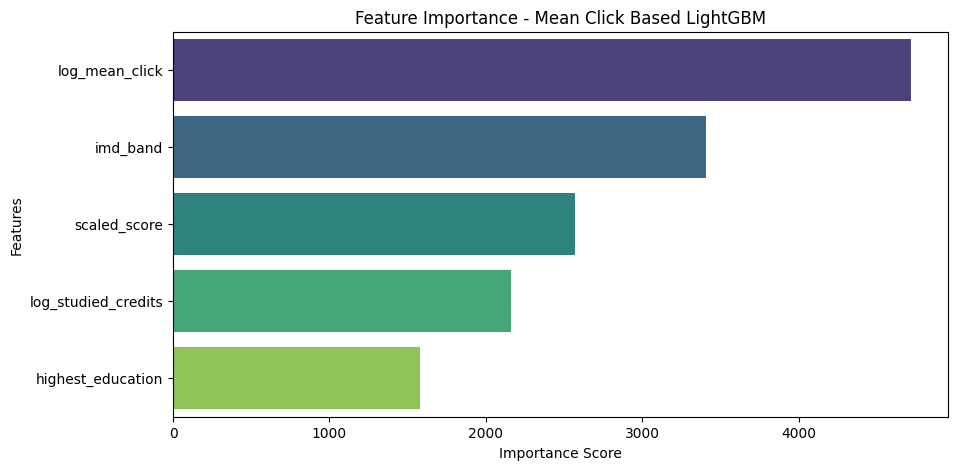

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
final_merged_data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. Feature Set 정의
sum_clicked_features = ['highest_education', 'imd_band', 'log_sum_click', 'log_studied_credits', 'scaled_score']
mean_clicked_features = ['highest_education', 'imd_band', 'log_mean_click', 'log_studied_credits', 'scaled_score']

sum_x = final_merged_data[sum_clicked_features]
mean_x = final_merged_data[mean_clicked_features]
y = final_merged_data['final_result']

# 3. 학습 데이터와 테스트 데이터 분리 (Train 90%, Test 10%)
sum_x_train, sum_x_test, y_train, y_test = train_test_split(sum_x, y, test_size=0.1, random_state=42, stratify=y)
mean_x_train, mean_x_test, y_train, y_test = train_test_split(mean_x, y, test_size=0.1, random_state=42, stratify=y)

# 4. 스케일링 (StandardScaler 적용)
scaler = StandardScaler()
sum_x_train  = scaler.fit_transform(sum_x_train).astype(np.float64)
sum_x_test  = scaler.transform(sum_x_test).astype(np.float64)

mean_x_train  = scaler.fit_transform(mean_x_train).astype(np.float64)
mean_x_test  = scaler.transform(mean_x_test).astype(np.float64)

# 5. 기본 LightGBM 모델 학습
lgb_sum_model = LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)
lgb_sum_model.fit(sum_x_train , y_train)
y_pred_sum = lgb_sum_model.predict(sum_x_test )

lgb_mean_model = LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5)
lgb_mean_model.fit(mean_x_train , y_train)
y_pred_mean = lgb_mean_model.predict(mean_x_test )

# 6. 기본 모델 성능 평가
def evaluate_model(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    r2 = r2_score(y_true, y_pred)
    print(f"\n=== {model_name} 성능 ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"R2 Score: {r2:.4f}")

evaluate_model("Sum Click 기반 LightGBM", y_test, y_pred_sum)
evaluate_model("Mean Click 기반 LightGBM", y_test, y_pred_mean)

# 7. 하이퍼파라미터 튜닝 (RandomizedSearchCV 적용)
param_dist = {
    'n_estimators': [100, 200, 500],  # 트리 개수
    'learning_rate': [0.01, 0.05, 0.1, 0.15],  # 학습률
    'max_depth': [3, 5, 7, 10],  # 트리 깊이
    'num_leaves': [20, 31, 50, 100],  # 리프 노드 개수
    'min_child_samples': [10, 20, 30, 50],  # 리프 노드 최소 샘플 수
    'subsample': [0.7, 0.8, 0.9, 1.0],  # 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # 트리별 특성 샘플링 비율
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 정규화
    'reg_lambda': [0, 0.1, 0.5, 1.0]  # L2 정규화
}

# RandomizedSearchCV 실행
random_search_sum = RandomizedSearchCV(LGBMClassifier(random_state=42), 
                                       param_distributions=param_dist, 
                                       n_iter=20,  # 랜덤 탐색 횟수 (너무 크면 시간 오래 걸림)
                                       cv=3, 
                                       scoring='accuracy', 
                                       n_jobs=-1, 
                                       verbose=1)
random_search_sum.fit(sum_x_train , y_train)

random_search_mean = RandomizedSearchCV(LGBMClassifier(random_state=42), 
                                        param_distributions=param_dist, 
                                        n_iter=20,  
                                        cv=3, 
                                        scoring='accuracy', 
                                        n_jobs=-1, 
                                        verbose=1)
random_search_mean.fit(mean_x_train , y_train)

# 8. 최적 하이퍼파라미터 확인
best_sum_model = random_search_sum.best_estimator_
best_mean_model = random_search_mean.best_estimator_

print("\n=== Sum Click 기반 최적화 LightGBM 성능 ===")
print(f"Best Parameters: {random_search_sum.best_params_}")

print("\n=== Mean Click 기반 최적화 LightGBM 성능 ===")
print(f"Best Parameters: {random_search_mean.best_params_}")

# 9. 최적 모델 성능 평가
y_pred_best_sum = best_sum_model.predict(sum_x_test )
y_pred_best_mean = best_mean_model.predict(mean_x_test )

evaluate_model("Best Sum Click 기반 LightGBM", y_test, y_pred_best_sum)
evaluate_model("Best Mean Click 기반 LightGBM", y_test, y_pred_best_mean)

# 10. Feature Importance 시각화
plt.figure(figsize=(10, 5))
feature_importances_sum = pd.Series(best_sum_model.feature_importances_, index=sum_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')
plt.title("Feature Importance - Sum Click Based LightGBM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

plt.figure(figsize=(10, 5))
feature_importances_mean = pd.Series(best_mean_model.feature_importances_, index=mean_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')
plt.title("Feature Importance - Mean Click Based LightGBM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# 불균형 잡고 LightGBM

In [35]:
# !pip install imblearn

Final Result Class Distribution Before SMOTE:
 final_result
1    160318
0     24598
Name: count, dtype: int64
Final Result Class Distribution After SMOTE:
 final_result
1    144286
0    144286
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 144286, number of negative: 144286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 748
[LightGBM] [Info] Number of data points in the train set: 288572, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

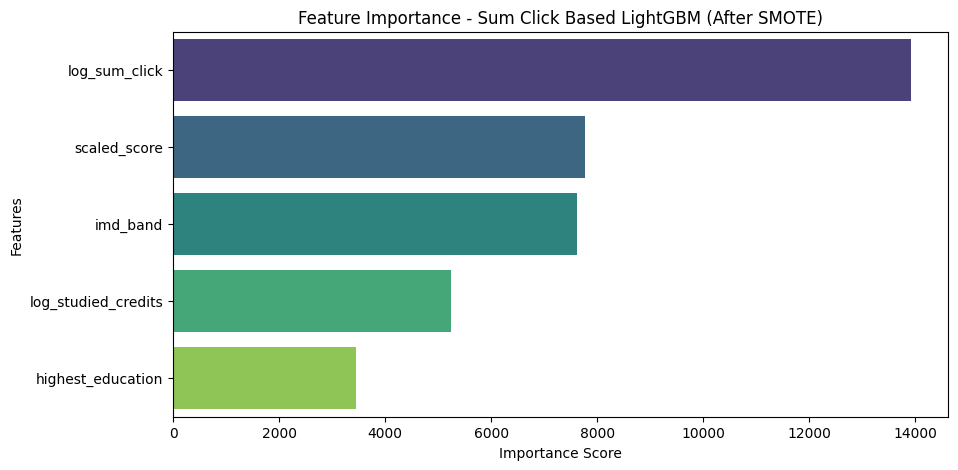

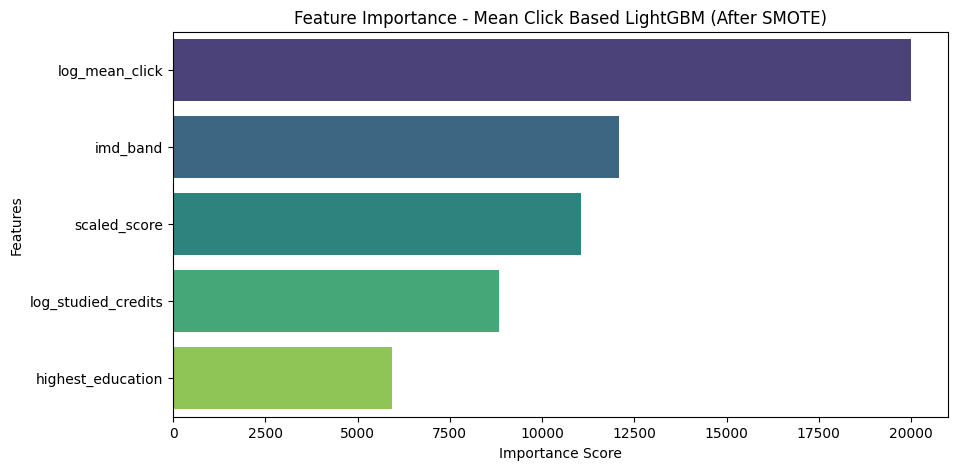

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
final_merged_data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. final_result 불균형 확인
print("Final Result Class Distribution Before SMOTE:\n", final_merged_data['final_result'].value_counts())

# 3. Feature Set 정의
sum_clicked_features = ['highest_education', 'imd_band', 'log_sum_click', 'log_studied_credits', 'scaled_score']
mean_clicked_features = ['highest_education', 'imd_band', 'log_mean_click', 'log_studied_credits', 'scaled_score']

sum_x = final_merged_data[sum_clicked_features]
mean_x = final_merged_data[mean_clicked_features]
y = final_merged_data['final_result']

# 4. 학습 데이터와 테스트 데이터 분리 (Train 90%, Test 10%)
sum_x_train, sum_x_test, y_train, y_test = train_test_split(sum_x, y, test_size=0.1, random_state=42, stratify=y)
mean_x_train, mean_x_test, y_train, y_test = train_test_split(mean_x, y, test_size=0.1, random_state=42, stratify=y)

# 5. 클래스 불균형 해결 (SMOTE 적용)
smote = SMOTE(random_state=42)

# ✅ sum_x_train과 y_train을 함께 오버샘플링
sum_x_train_smote, y_train_smote = smote.fit_resample(sum_x_train, y_train)

# ✅ mean_x_train도 따로 y_train을 기준으로 오버샘플링
mean_x_train_smote, y_train_smote = smote.fit_resample(mean_x_train, y_train)

# 6. SMOTE 적용 후 클래스 분포 확인
print("Final Result Class Distribution After SMOTE:\n", pd.Series(y_train_smote).value_counts())

# 7. 스케일링 (RobustScaler 사용)
scaler = RobustScaler()
sum_x_train  = scaler.fit_transform(sum_x_train_smote).astype(np.float64)
sum_x_test  = scaler.transform(sum_x_test).astype(np.float64)

mean_x_train  = scaler.fit_transform(mean_x_train_smote).astype(np.float64)
mean_x_test  = scaler.transform(mean_x_test).astype(np.float64)

# 8. 최적화된 LightGBM 하이퍼파라미터 적용
best_sum_params = {
    'subsample': 0.8,
    'reg_lambda': 0.1,
    'reg_alpha': 0.5,
    'num_leaves': 50,
    'n_estimators': 800,
    'min_child_samples': 20,
    'max_depth': 7,
    'learning_rate': 0.1,
    'colsample_bytree': 0.9,
    'random_state': 42
}

best_mean_params = {
    'subsample': 0.9,
    'reg_lambda': 1.0,
    'reg_alpha': 0.1,
    'num_leaves': 120,
    'n_estimators': 500,
    'min_child_samples': 15,
    'max_depth': 10,
    'learning_rate': 0.08,
    'colsample_bytree': 0.8,
    'random_state': 42
}

lgb_sum_model = LGBMClassifier(**best_sum_params)
lgb_sum_model.fit(sum_x_train , y_train_smote)
y_pred_best_sum = lgb_sum_model.predict(sum_x_test )

lgb_mean_model = LGBMClassifier(**best_mean_params)
lgb_mean_model.fit(mean_x_train , y_train_smote)
y_pred_best_mean = lgb_mean_model.predict(mean_x_test )

# 9. 최적 모델 성능 평가
def evaluate_model(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    r2 = r2_score(y_true, y_pred)
    print(f"\n=== {model_name} 성능 ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model("Best Sum Click 기반 LightGBM (After SMOTE)", y_test, y_pred_best_sum)
evaluate_model("Best Mean Click 기반 LightGBM (After SMOTE)", y_test, y_pred_best_mean)

# 10. Feature Importance 시각화
plt.figure(figsize=(10, 5))
feature_importances_sum = pd.Series(lgb_sum_model.feature_importances_, index=sum_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')
plt.title("Feature Importance - Sum Click Based LightGBM (After SMOTE)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

plt.figure(figsize=(10, 5))
feature_importances_mean = pd.Series(lgb_mean_model.feature_importances_, index=mean_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')
plt.title("Feature Importance - Mean Click Based LightGBM (After SMOTE)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 144286, number of negative: 22138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 166424, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 144286, number of negative: 22138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

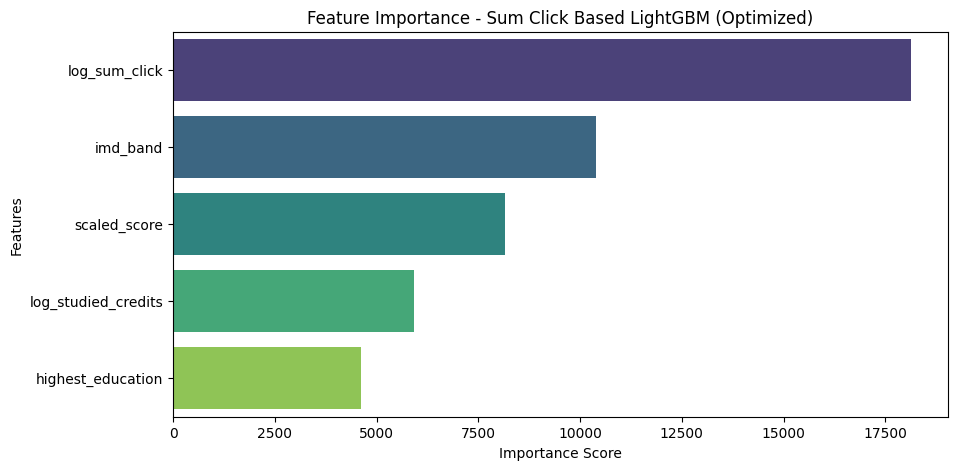

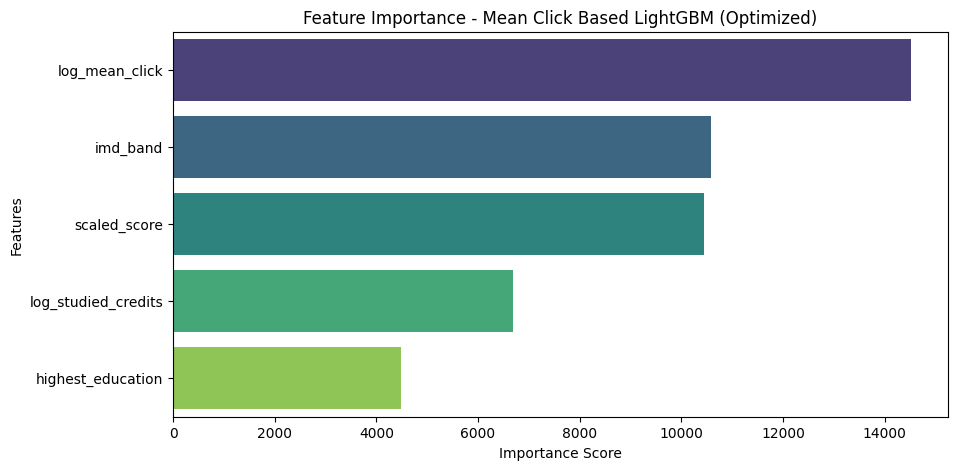

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
final_merged_data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. Feature Set 정의
sum_clicked_features = ['highest_education', 'imd_band', 'log_sum_click', 'log_studied_credits', 'scaled_score']
mean_clicked_features = ['highest_education', 'imd_band', 'log_mean_click', 'log_studied_credits', 'scaled_score']

sum_x = final_merged_data[sum_clicked_features]
mean_x = final_merged_data[mean_clicked_features]
y = final_merged_data['final_result']

# 3. 학습 데이터와 테스트 데이터 분리 (Train 90%, Test 10%)
sum_x_train, sum_x_test, y_train, y_test = train_test_split(sum_x, y, test_size=0.1, random_state=42, stratify=y)
mean_x_train, mean_x_test, y_train, y_test = train_test_split(mean_x, y, test_size=0.1, random_state=42, stratify=y)

# 4. 스케일링 (RobustScaler 사용)
scaler = RobustScaler()
sum_x_train  = scaler.fit_transform(sum_x_train).astype(np.float64)
sum_x_test  = scaler.transform(sum_x_test).astype(np.float64)

mean_x_train  = scaler.fit_transform(mean_x_train).astype(np.float64)
mean_x_test  = scaler.transform(mean_x_test).astype(np.float64)

# 5. 최적의 하이퍼파라미터 탐색 (RandomizedSearchCV)
param_dist = {
    'n_estimators': [200, 400, 600, 800],  # 트리 개수
    'learning_rate': [0.01, 0.05, 0.1, 0.15],  # 학습률
    'max_depth': [5, 7, 9, 11],  # 트리 깊이
    'num_leaves': [20, 40, 60, 80],  # 리프 노드 개수
    'min_child_samples': [20, 30, 50, 70],  # 최소 샘플 수
    'subsample': [0.7, 0.8, 0.9, 1.0],  # 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # 트리별 특성 샘플링 비율
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 정규화
    'reg_lambda': [0, 0.1, 0.5, 1.0]  # L2 정규화
}

# ✅ RandomizedSearchCV 실행 (Sum Click 기준)
random_search_sum = RandomizedSearchCV(LGBMClassifier(class_weight='balanced', random_state=42),
                                       param_distributions=param_dist,
                                       n_iter=30,  # 랜덤 탐색 횟수 증가
                                       cv=3,
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       verbose=1)
random_search_sum.fit(sum_x_train , y_train)

# ✅ RandomizedSearchCV 실행 (Mean Click 기준)
random_search_mean = RandomizedSearchCV(LGBMClassifier(class_weight='balanced', random_state=42),
                                        param_distributions=param_dist,
                                        n_iter=30,
                                        cv=3,
                                        scoring='accuracy',
                                        n_jobs=-1,
                                        verbose=1)
random_search_mean.fit(mean_x_train , y_train)

# 6. 최적 하이퍼파라미터 확인
best_sum_params = random_search_sum.best_params_
best_mean_params = random_search_mean.best_params_

print("\n=== Sum Click 기반 최적화 LightGBM 성능 ===")
print(f"Best Parameters: {best_sum_params}")

print("\n=== Mean Click 기반 최적화 LightGBM 성능 ===")
print(f"Best Parameters: {best_mean_params}")

# 7. 최적 하이퍼파라미터 적용하여 모델 학습
lgb_sum_model = LGBMClassifier(**best_sum_params, class_weight='balanced', random_state=42)
lgb_sum_model.fit(sum_x_train , y_train)
y_pred_best_sum = lgb_sum_model.predict(sum_x_test )

lgb_mean_model = LGBMClassifier(**best_mean_params, class_weight='balanced', random_state=42)
lgb_mean_model.fit(mean_x_train , y_train)
y_pred_best_mean = lgb_mean_model.predict(mean_x_test )

# 8. 최적 모델 성능 평가
def evaluate_model(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    r2 = r2_score(y_true, y_pred)
    print(f"\n=== {model_name} 성능 ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model("Best Sum Click 기반 LightGBM", y_test, y_pred_best_sum)
evaluate_model("Best Mean Click 기반 LightGBM", y_test, y_pred_best_mean)

# 9. Feature Importance 시각화
plt.figure(figsize=(10, 5))
feature_importances_sum = pd.Series(lgb_sum_model.feature_importances_, index=sum_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')
plt.title("Feature Importance - Sum Click Based LightGBM (Optimized)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

plt.figure(figsize=(10, 5))
feature_importances_mean = pd.Series(lgb_mean_model.feature_importances_, index=mean_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')
plt.title("Feature Importance - Mean Click Based LightGBM (Optimized)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


# 수정된 gradient boosting 코드


=== Best Sum Click 기반 Gradient Boosting 성능 ===
Accuracy: 0.9038
F1 Score: 0.8982
R2 Score: 0.1659
Confusion Matrix:
[[ 1280  1180]
 [  599 15433]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.52      0.59      2460
           1       0.93      0.96      0.95     16032

    accuracy                           0.90     18492
   macro avg       0.81      0.74      0.77     18492
weighted avg       0.90      0.90      0.90     18492


=== Best Mean Click 기반 Gradient Boosting 성능 ===
Accuracy: 0.9054
F1 Score: 0.8921
R2 Score: 0.1795
Confusion Matrix:
[[  995  1465]
 [  285 15747]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.40      0.53      2460
           1       0.91      0.98      0.95     16032

    accuracy                           0.91     18492
   macro avg       0.85      0.69      0.74     18492
weighted avg       0.90      0.91      0.89     18492



C:\Users\woori\AppData\Local\Temp\ipykernel_28244\4033686867.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')


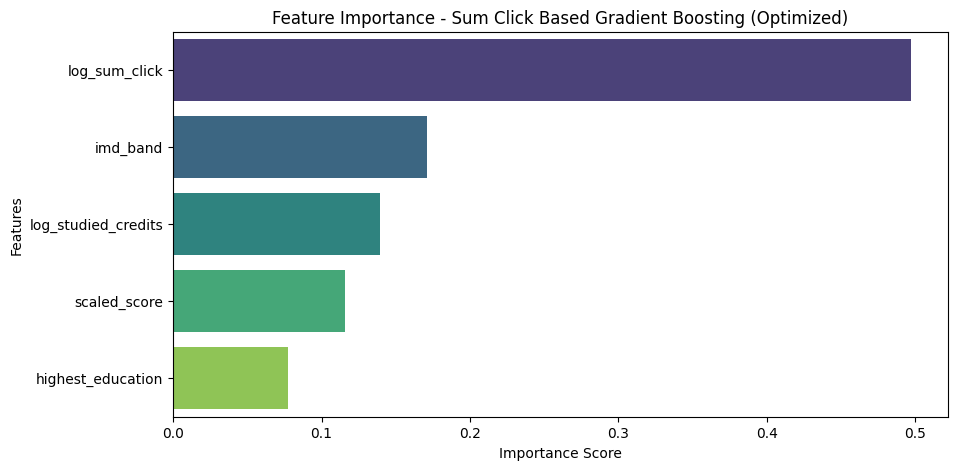

C:\Users\woori\AppData\Local\Temp\ipykernel_28244\4033686867.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')


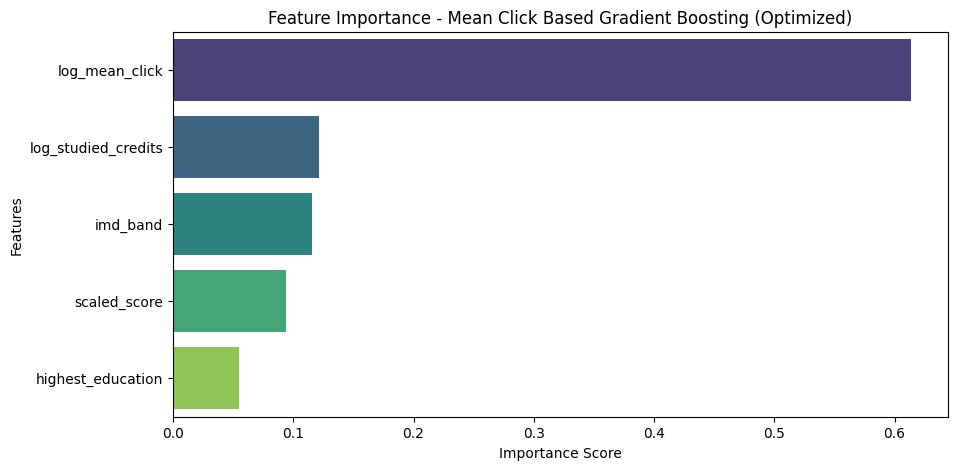

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
final_merged_data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. Feature Set 정의 (원본 데이터 유지)
sum_clicked_features = ['highest_education', 'imd_band', 'log_sum_click', 'log_studied_credits', 'scaled_score']
mean_clicked_features = ['highest_education', 'imd_band', 'log_mean_click', 'log_studied_credits', 'scaled_score']

sum_x = final_merged_data[sum_clicked_features]
mean_x = final_merged_data[mean_clicked_features]
y = final_merged_data['final_result']

# 3. 학습 데이터와 테스트 데이터 분리 (Train 90%, Test 10%)
sum_x_train, sum_x_test, y_train, y_test = train_test_split(sum_x, y, test_size=0.1, random_state=42, stratify=y)
mean_x_train, mean_x_test, y_train, y_test = train_test_split(mean_x, y, test_size=0.1, random_state=42, stratify=y)


# 4. 최적의 하이퍼파라미터 적용
best_sum_params = {
    'subsample': 0.9,
    'n_estimators': 600,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': None,
    'max_depth': 9,
    'learning_rate': 0.15,
    'random_state': 42
}

best_mean_params = {
    'subsample': 0.8,
    'n_estimators': 600,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
    'max_features': None,
    'max_depth': 9,
    'learning_rate': 0.1,
    'random_state': 42
}

# 5. 모델 학습 및 예측
gbm_sum_model = GradientBoostingClassifier(**best_sum_params)
gbm_sum_model.fit(sum_x_train , y_train)
y_pred_best_sum = gbm_sum_model.predict(sum_x_test)

gbm_mean_model = GradientBoostingClassifier(**best_mean_params)
gbm_mean_model.fit(mean_x_train , y_train)
y_pred_best_mean = gbm_mean_model.predict(mean_x_test )

# 6. 최적 모델 성능 평가
def evaluate_model(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    r2 = r2_score(y_true, y_pred)
    print(f"\n=== {model_name} 성능 ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

evaluate_model("Best Sum Click 기반 Gradient Boosting", y_test, y_pred_best_sum)
evaluate_model("Best Mean Click 기반 Gradient Boosting", y_test, y_pred_best_mean)

# 7. Feature Importance 시각화
plt.figure(figsize=(10, 5))
feature_importances_sum = pd.Series(gbm_sum_model.feature_importances_, index=sum_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')
plt.title("Feature Importance - Sum Click Based Gradient Boosting (Optimized)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

plt.figure(figsize=(10, 5))
feature_importances_mean = pd.Series(gbm_mean_model.feature_importances_, index=mean_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')
plt.title("Feature Importance - Mean Click Based Gradient Boosting (Optimized)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


[LightGBM] [Info] Number of positive: 144286, number of negative: 22138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 166424, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.866978 -> initscore=1.874502
[LightGBM] [Info] Start training from score 1.874502
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

C:\Users\woori\AppData\Local\Temp\ipykernel_28244\2511356057.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')


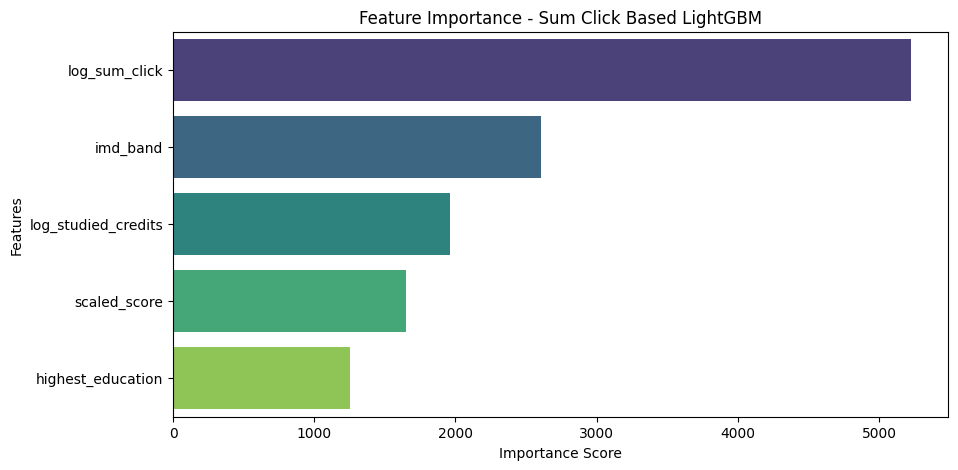

C:\Users\woori\AppData\Local\Temp\ipykernel_28244\2511356057.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')


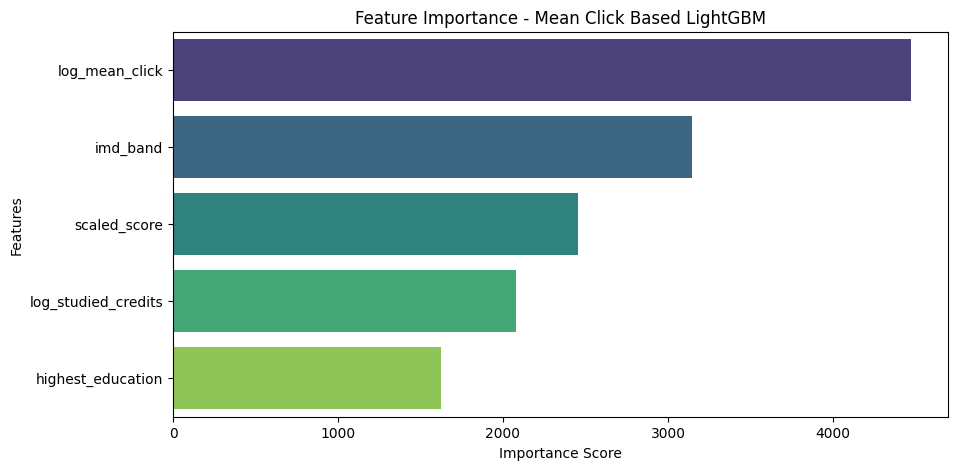

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
final_merged_data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. Feature Set 정의 (원본 데이터 유지)
sum_clicked_features = ['highest_education', 'imd_band', 'log_sum_click', 'log_studied_credits', 'scaled_score']
mean_clicked_features = ['highest_education', 'imd_band', 'log_mean_click', 'log_studied_credits', 'scaled_score']

sum_x = final_merged_data[sum_clicked_features]
mean_x = final_merged_data[mean_clicked_features]
y = final_merged_data['final_result']

# 3. 학습 데이터와 테스트 데이터 분리 (Train 90%, Test 10%)
sum_x_train, sum_x_test, y_train, y_test = train_test_split(sum_x, y, test_size=0.1, random_state=42, stratify=y)
mean_x_train, mean_x_test, y_train, y_test = train_test_split(mean_x, y, test_size=0.1, random_state=42, stratify=y)

# 4. 최적의 하이퍼파라미터 적용 (LightGBM)
best_sum_params = {
    'subsample': 0.7,
    'reg_lambda': 0.1,
    'reg_alpha': 0.5,
    'num_leaves': 31,
    'n_estimators': 500,
    'min_child_samples': 30,
    'max_depth': 5,
    'learning_rate': 0.15,
    'colsample_bytree': 1.0,
    'random_state': 42
}

best_mean_params = {
    'subsample': 0.7,
    'reg_lambda': 1.0,
    'reg_alpha': 0.1,
    'num_leaves': 100,
    'n_estimators': 200,
    'min_child_samples': 20,
    'max_depth': 7,
    'learning_rate': 0.15,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# 5. LightGBM 모델 학습 및 예측
lgbm_sum_model = LGBMClassifier(**best_sum_params)
lgbm_sum_model.fit(sum_x_train, y_train)
y_pred_best_sum = lgbm_sum_model.predict(sum_x_test)

lgbm_mean_model = LGBMClassifier(**best_mean_params)
lgbm_mean_model.fit(mean_x_train, y_train)
y_pred_best_mean = lgbm_mean_model.predict(mean_x_test)

# 6. 최적 모델 성능 평가 함수
def evaluate_model(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n=== {model_name} 성능 ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# 7. 평가 실행
evaluate_model("Best Sum Click 기반 LightGBM", y_test, y_pred_best_sum)
evaluate_model("Best Mean Click 기반 LightGBM", y_test, y_pred_best_mean)

# 8. Feature Importance 시각화
plt.figure(figsize=(10, 5))
feature_importances_sum = pd.Series(lgbm_sum_model.feature_importances_, index=sum_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Sum Click Based LightGBM")
plt.show()

plt.figure(figsize=(10, 5))
feature_importances_mean = pd.Series(lgbm_mean_model.feature_importances_, index=mean_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Mean Click Based LightGBM")
plt.show()



=== Best Sum Click 기반 Random Forest 성능 ===
Accuracy: 0.8833
F1 Score: 0.8590
R2 Score: -0.0118

Confusion Matrix:
[[  602  1858]
 [  300 15732]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.24      0.36      2460
           1       0.89      0.98      0.94     16032

    accuracy                           0.88     18492
   macro avg       0.78      0.61      0.65     18492
weighted avg       0.86      0.88      0.86     18492


=== Best Mean Click 기반 Random Forest 성능 ===
Accuracy: 0.8822
F1 Score: 0.8550
R2 Score: -0.0217

Confusion Matrix:
[[  539  1921]
 [  258 15774]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.22      0.33      2460
           1       0.89      0.98      0.94     16032

    accuracy                           0.88     18492
   macro avg       0.78      0.60      0.63     18492
weighted avg       0.86      0.88      0.85     18492



C:\Users\woori\AppData\Local\Temp\ipykernel_28244\2249854085.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')


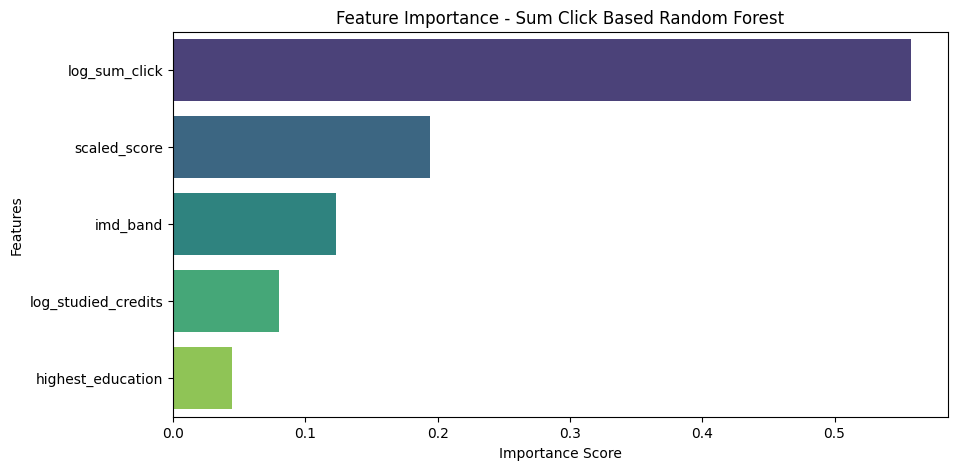

C:\Users\woori\AppData\Local\Temp\ipykernel_28244\2249854085.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')


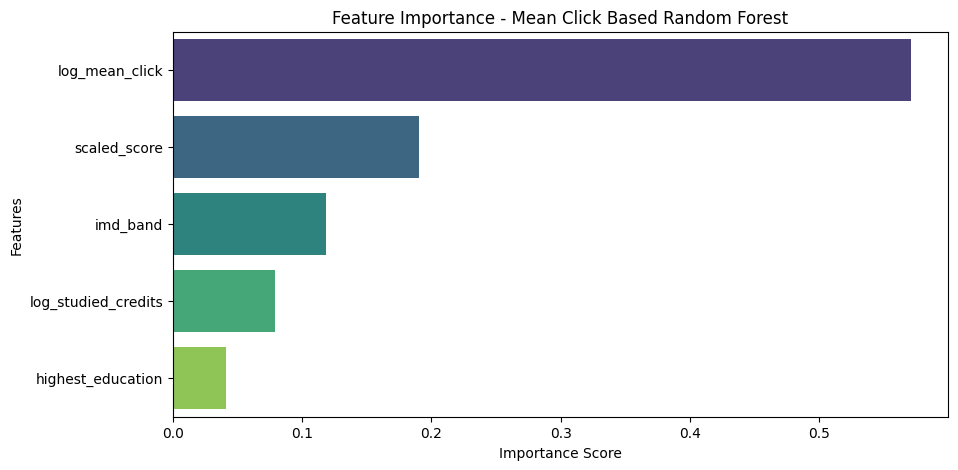

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

# 1. 데이터 로드
final_merged_data = pd.read_csv('./data/merged_data_cleaned.csv')

# 2. Feature Set 정의 (원본 데이터 유지)
sum_clicked_features = ['highest_education', 'imd_band', 'log_sum_click', 'log_studied_credits', 'scaled_score']
mean_clicked_features = ['highest_education', 'imd_band', 'log_mean_click', 'log_studied_credits', 'scaled_score']

sum_x = final_merged_data[sum_clicked_features]
mean_x = final_merged_data[mean_clicked_features]
y = final_merged_data['final_result']

# 3. 학습 데이터와 테스트 데이터 분리 (Train 90%, Test 10%)
sum_x_train, sum_x_test, y_train, y_test = train_test_split(sum_x, y, test_size=0.1, random_state=42, stratify=y)
mean_x_train, mean_x_test, y_train, y_test = train_test_split(mean_x, y, test_size=0.1, random_state=42, stratify=y)

# 4. 최적의 하이퍼파라미터 적용 (Random Forest)
best_sum_params = {
    'max_depth': 20,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 300,
    'random_state': 42
}

best_mean_params = {
    'max_depth': 20,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 300,
    'random_state': 42
}

# 5. Random Forest 모델 학습 및 예측
rf_sum_model = RandomForestClassifier(**best_sum_params)
rf_sum_model.fit(sum_x_train, y_train)
y_pred_best_sum = rf_sum_model.predict(sum_x_test)

rf_mean_model = RandomForestClassifier(**best_mean_params)
rf_mean_model.fit(mean_x_train, y_train)
y_pred_best_mean = rf_mean_model.predict(mean_x_test)

# 6. 최적 모델 성능 평가 함수
def evaluate_model(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n=== {model_name} 성능 ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# 7. 평가 실행
evaluate_model("Best Sum Click 기반 Random Forest", y_test, y_pred_best_sum)
evaluate_model("Best Mean Click 기반 Random Forest", y_test, y_pred_best_mean)

# 8. Feature Importance 시각화
plt.figure(figsize=(10, 5))
feature_importances_sum = pd.Series(rf_sum_model.feature_importances_, index=sum_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_sum, y=feature_importances_sum.index, palette='viridis')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Sum Click Based Random Forest")
plt.show()

plt.figure(figsize=(10, 5))
feature_importances_mean = pd.Series(rf_mean_model.feature_importances_, index=mean_clicked_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_mean, y=feature_importances_mean.index, palette='viridis')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Mean Click Based Random Forest")
plt.show()
